In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

from halton import halton_sequence

# Problem:

Solving the problem $\frac{d^2u}{dx^2} = f(x)$ on the interval $[0,1]$ for a given $f$ with boundary conditions $u(0) = a$ and $u(1)=b$.

# The 3-Point Stencil

For points equally distributed with step-size $h$ the three point finite difference formula is given by

$$
\frac{d^2u}{dx^2} \approx \frac{1}{h^2} \big(u(x_{-1}) - 2u(x_0) + u(x_{1}) \big)
$$

Applying this formula at all points on the grid, and including the boundary conditions we can approximate the solution to the differential equation with a system of equations.

In [2]:
# forcing function
def foo(x):
    return np.cos(2*np.pi * x)
# end points
a, b = 0, 0

# number of points on the interior
n = 20

# analytical solution
def exact(x):
    return -1/(4*np.pi**2) * np.cos(2*np.pi *x)+1

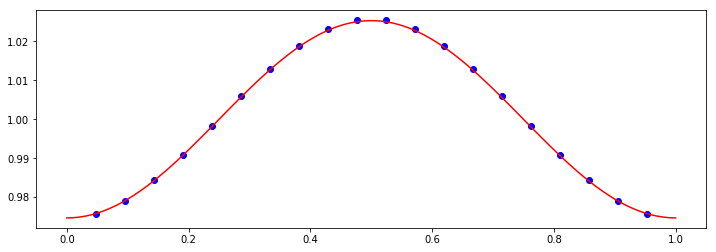

In [3]:
h = 1/(n+1)
xs = np.linspace(h, 1-h, n)
D = np.diag([-2]*n) + np.diag([1]*(n-1),k=-1) + np.diag([1]*(n-1),k=1)
f = h**2*foo(xs)
f[0] -= exact(a)
f[-1] -= exact(b)
u = la.solve(D, f)

fig = plt.figure(figsize=(12,4))
plt.plot(xs, u, 'bo')
plt.plot(np.linspace(0,1,100), exact(np.linspace(0,1,100)), 'r-')
plt.show()

# Radial Basis Function Finite Differences

In the previous example, the appropriate weights to use were given. We would like to geralize this by finding weights for any given stencil using radial basis functions.

In [4]:
# forcing function
def foo(x):
    return np.cos(2*np.pi * x)
# end points
a, b = 0, 0

# number of points on the interior
n = 10

# RBF and second derivative
eps = 5
def rbf(r, eps):
    return np.exp(-eps * r**2)
def rbf_d2(r, eps):
    return 2*eps*(2*eps*r**2 - 1)*np.exp(-eps*r**2)

# analytical solution
def exact(x):
    return -1/(4*np.pi**2) * np.cos(2*np.pi *x)+1

Condition number of RBF matrix: 5.93383e+11


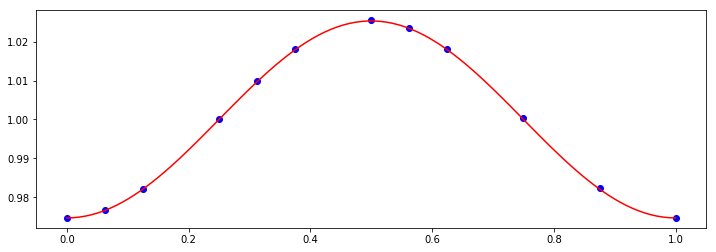

In [5]:
def rbf(r, eps):
    return np.exp(-eps * r**2)
def rbf_d2(r, eps):
    return 2*eps*(2*eps*r**2 - 1)*np.exp(-eps*r**2)

xs = np.zeros(n+2)
xs[1:-1] = halton_sequence(1, n, 1).flatten() #generates n halton points between 0 and 1
xs[0] = 0 # add the interior points
xs[-1] = 1

xs.sort() # helps for plotting

A = rbf(np.abs(np.subtract.outer(xs,xs)), eps)
print('Condition number of RBF matrix: %g' % la.cond(A))
d2_phi = rbf_d2(np.abs(np.subtract.outer(xs,xs)), eps)

W = la.solve(A, d2_phi).T

# Enforce the boundary conditions
W[0] = [1]+[0]*(n+1)
W[-1] = [0]*(n+1) + [1]

f = foo(xs) # forcing term
f[0] = exact(a)  # boundary conditions
f[-1] = exact(b)

u = la.solve(W,f)

fig = plt.figure(figsize=(12,4))
plt.plot(xs, u, 'bo')
plt.plot(np.linspace(0,1,100), exact(np.linspace(0,1,100)), 'r-')
plt.show()